In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
data = pd.read_csv("covid_19_clean_complete (1).csv", parse_dates = ['Date'])
# parse dates will change the string datatype to date time format

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [6]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [7]:
data.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'WHO Region'],
      dtype='object')

In [8]:
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']

In [9]:
data['active']

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [10]:
# to get the maximum value of every column with respect to date and also latest or last date
top = data[data['date'] == data['date'].max()]

In [11]:
data['state'].value_counts()

state
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: count, Length: 78, dtype: int64

In [12]:
top[top['country']=='Australia']

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48815,Australian Capital Territory,Australia,-35.4735,149.0124,2020-07-27,113,3,109,1,Western Pacific
48816,New South Wales,Australia,-33.8688,151.2093,2020-07-27,3699,49,2989,661,Western Pacific
48817,Northern Territory,Australia,-12.4634,130.8456,2020-07-27,31,0,30,1,Western Pacific
48818,Queensland,Australia,-27.4698,153.0251,2020-07-27,1076,6,1063,7,Western Pacific
48819,South Australia,Australia,-34.9285,138.6007,2020-07-27,447,4,441,2,Western Pacific
48820,Tasmania,Australia,-42.8821,147.3272,2020-07-27,229,13,215,1,Western Pacific
48821,Victoria,Australia,-37.8136,144.9631,2020-07-27,9049,83,3817,5149,Western Pacific
48822,Western Australia,Australia,-31.9505,115.8605,2020-07-27,659,9,647,3,Western Pacific


In [14]:
# use groupby to only focus on the death confirmed and active cases etc.
w = top.groupby('country')[['confirmed','active','deaths']].sum().reset_index()

In [15]:
w.tail()

,country,confirmed,active,deaths
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140
186,Zimbabwe,2704,2126,36


In [16]:
w.head()

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41


In [17]:
fig = px.choropleth(w,locations='country',locationmode='country names',color='deaths',hover_name='country',range_color=[1,1500],color_continuous_scale='Peach',title='Active Cases Country')

In [18]:
fig.show()

In [19]:
#Top 20 countries based on active cases
t_actives = top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Country')

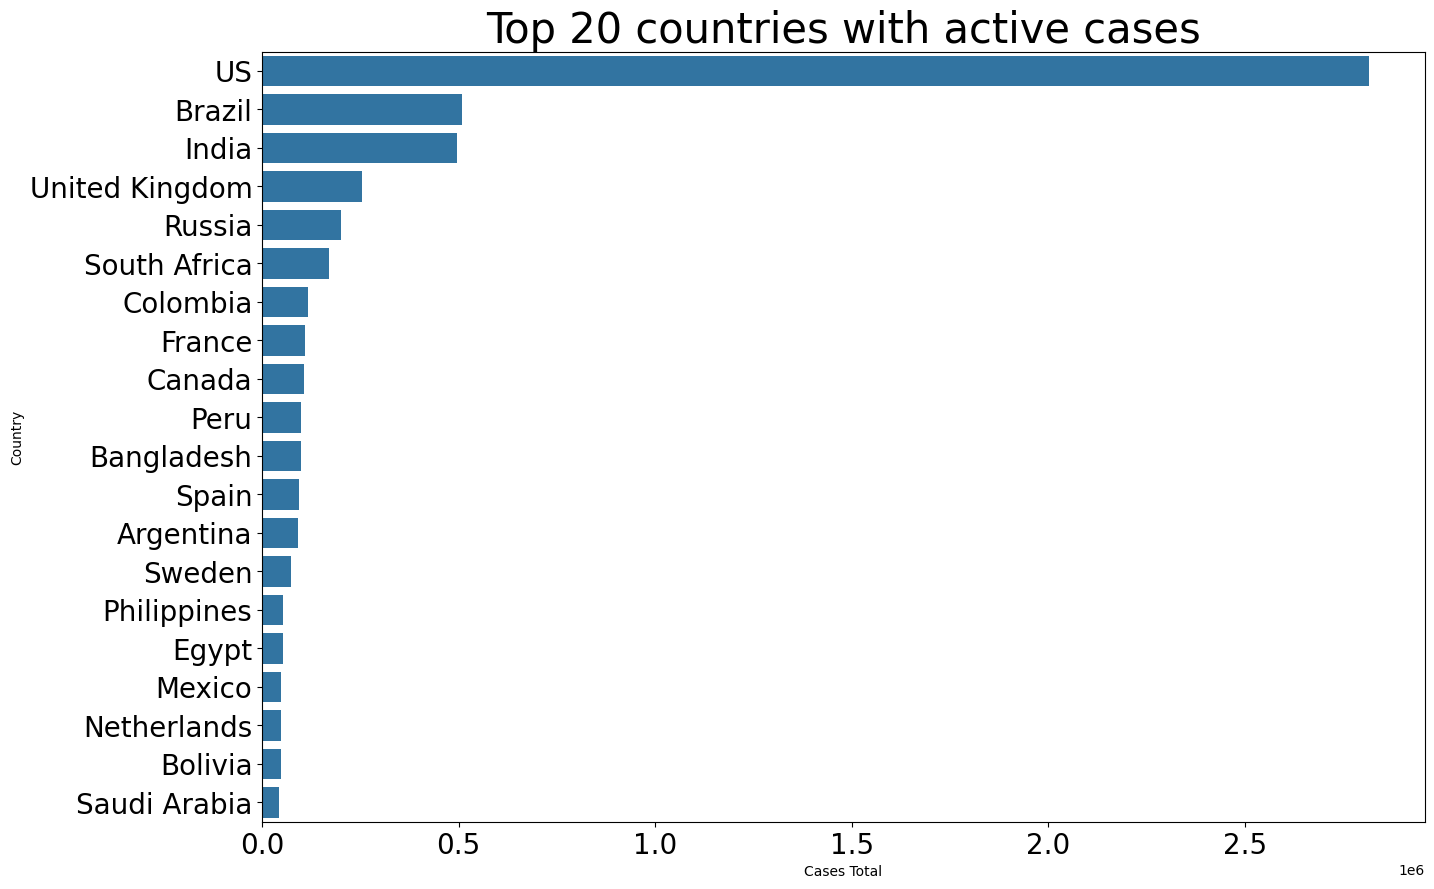

In [20]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries with active cases', fontsize=30)
a = sns.barplot(x=t_actives.active, y=t_actives.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases Total')
plt.ylabel('Country')

In [21]:
#task is
# #Top 20 countries based on death cases also visualise
t_deaths = top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Country')

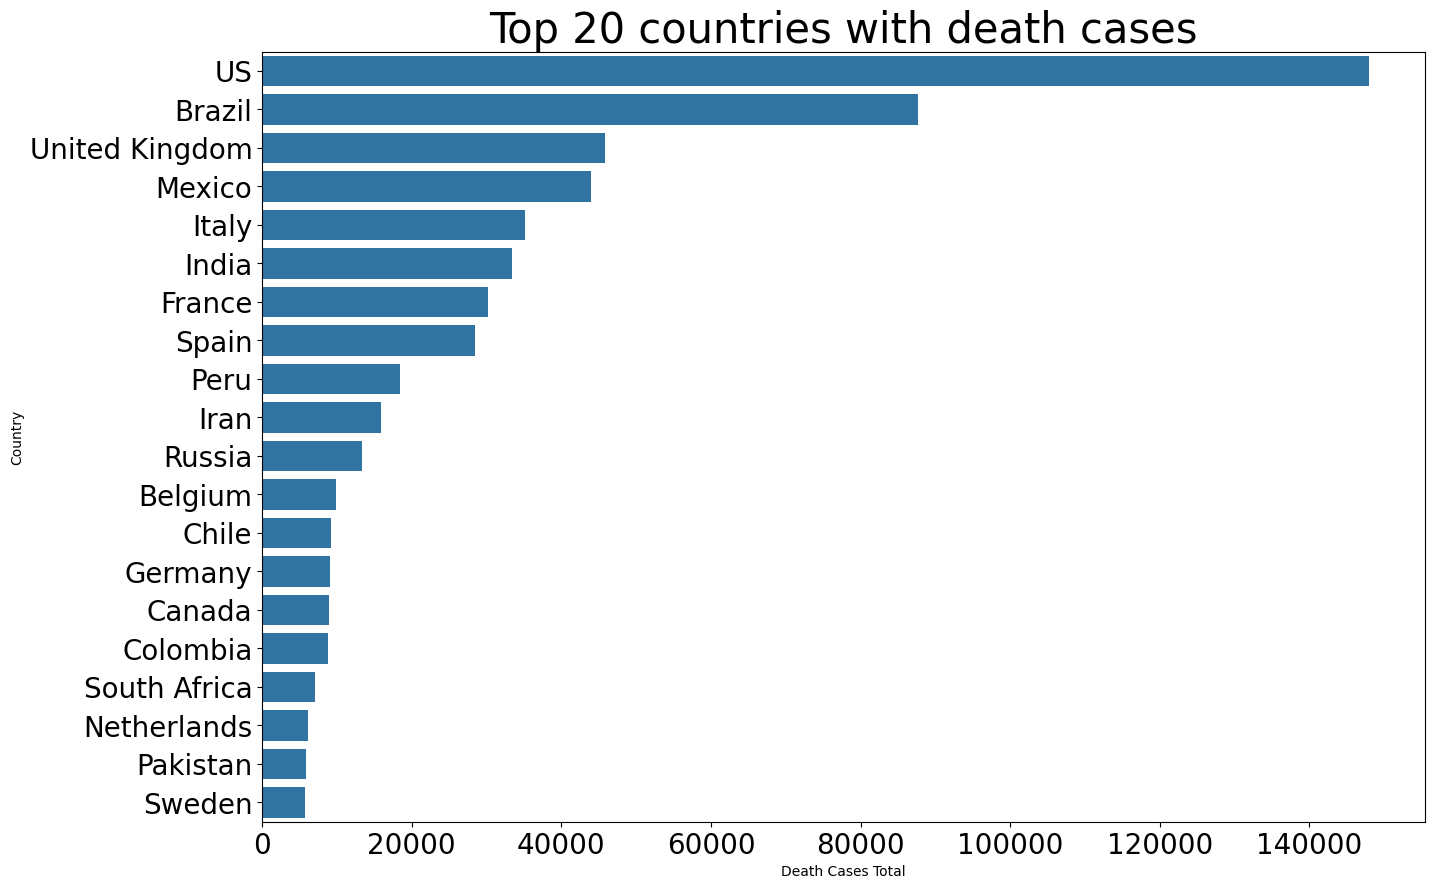

In [22]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries with death cases', fontsize=30)
a = sns.barplot(x=t_deaths.deaths, y=t_deaths.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Death Cases Total')
plt.ylabel('Country')

In [23]:
#task is
# #Top 20 countries based on recovered cases also visualise
t_recovered = top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
t_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Country')

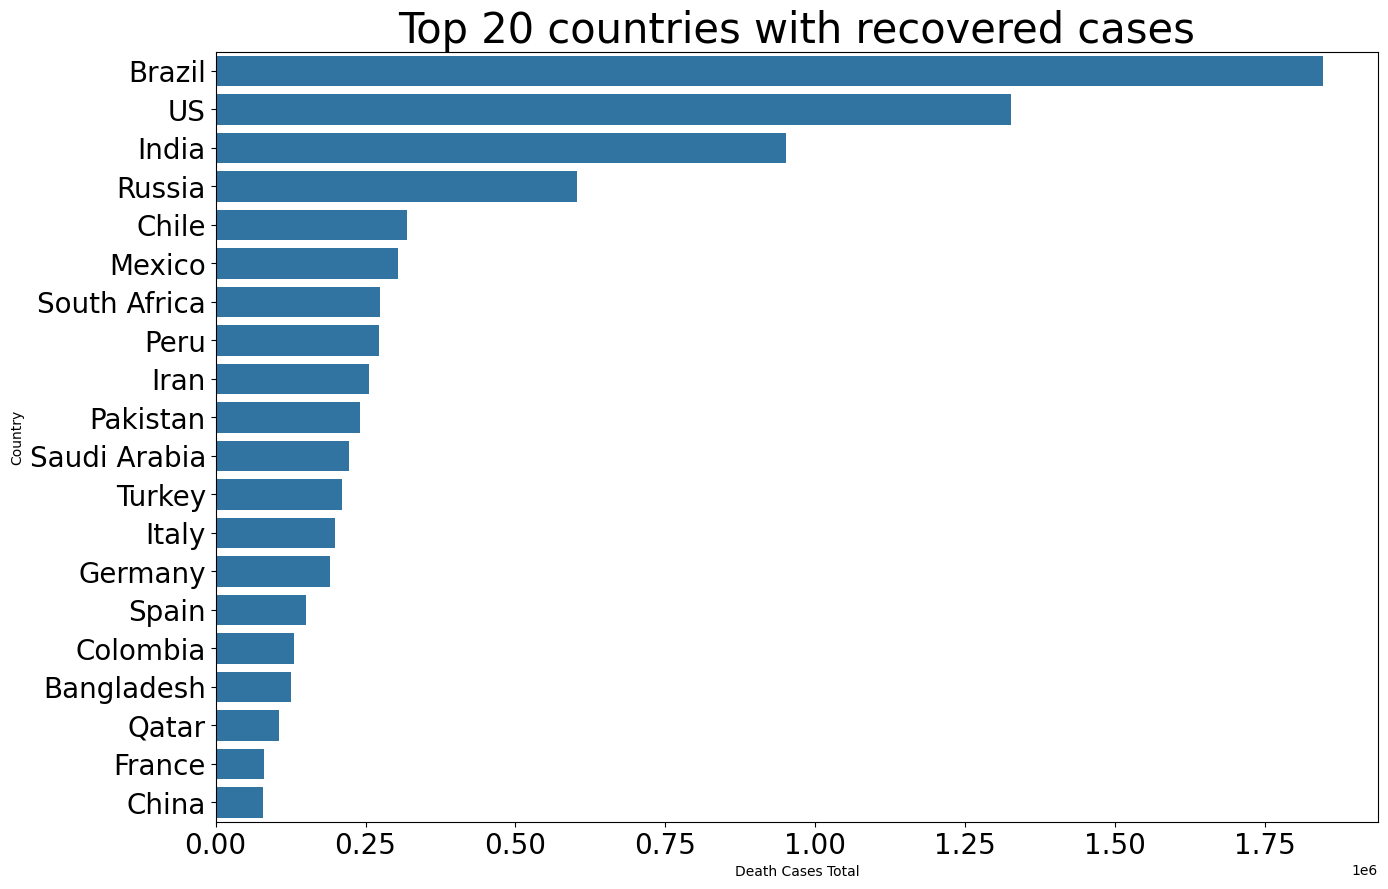

In [24]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries with recovered cases', fontsize=30)
a = sns.barplot(x=t_recovered.recovered, y=t_recovered.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Death Cases Total')
plt.ylabel('Country')

In [ ]:
# we are done with the analysis now we need to move ahead and forecast

In [29]:
#FB Prophet
pip install prophet


     ---------------------------------------- 13.3/13.3 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 94.4/94.4 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 932.4/932.4 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from prophet import Prophet

c:\Users\atul7\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [31]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [32]:
data.groupby('date').sum().head()

,state,country,lat,long,confirmed,deaths,recovered,active,WHO Region
date,,,,,,,,,
2020-01-22,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,555,17,28,510,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-23,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,654,18,30,606,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-24,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,941,26,36,879,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-25,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,1434,42,39,1353,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-26,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,2118,56,52,2010,Eastern MediterraneanEuropeAfricaEuropeAfricaA...


In [33]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()

In [34]:
confirmed.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [35]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [36]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [37]:
deaths.tail()

,date,deaths
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621
187,2020-07-27,654036


In [38]:
recovered.head()

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [39]:
recovered.tail()

,date,recovered
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
187,2020-07-27,9468087


In [40]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [41]:
#Forecast for the confirmed cases
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [42]:
m = Prophet(interval_width = 0.95) #we are initializing the Prophet class with confidence interval of 95 %

In [43]:
m.fit(confirmed) # fitting and training the model on the historical confirmed cases data

22:12:28 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# let's do some forecast
future = m.make_future_dataframe(periods = 7, freq = 'D')
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [45]:
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [46]:
# actual forecast
forecast = m.predict(future)

In [47]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.034240e+04,-1.821762e+05,1.381127e+05
1,2020-01-23,-7.746625e+03,-1.636897e+05,1.474792e+05
2,2020-01-24,6.123967e+03,-1.661130e+05,1.684444e+05
3,2020-01-25,1.237938e+04,-1.556667e+05,1.794785e+05
4,2020-01-26,8.615766e+03,-1.620234e+05,1.627701e+05
...,...,...,...,...
190,2020-07-30,1.674820e+07,1.659420e+07,1.691446e+07
191,2020-07-31,1.696362e+07,1.680706e+07,1.712439e+07
192,2020-08-01,1.717143e+07,1.700522e+07,1.734173e+07
193,2020-08-02,1.736922e+07,1.719456e+07,1.754893e+07


c:\Users\atul7\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



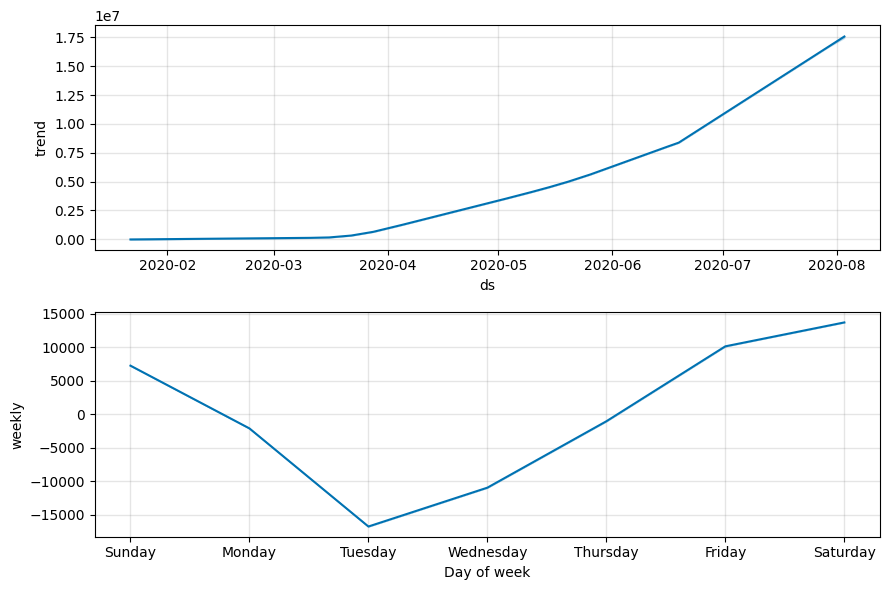

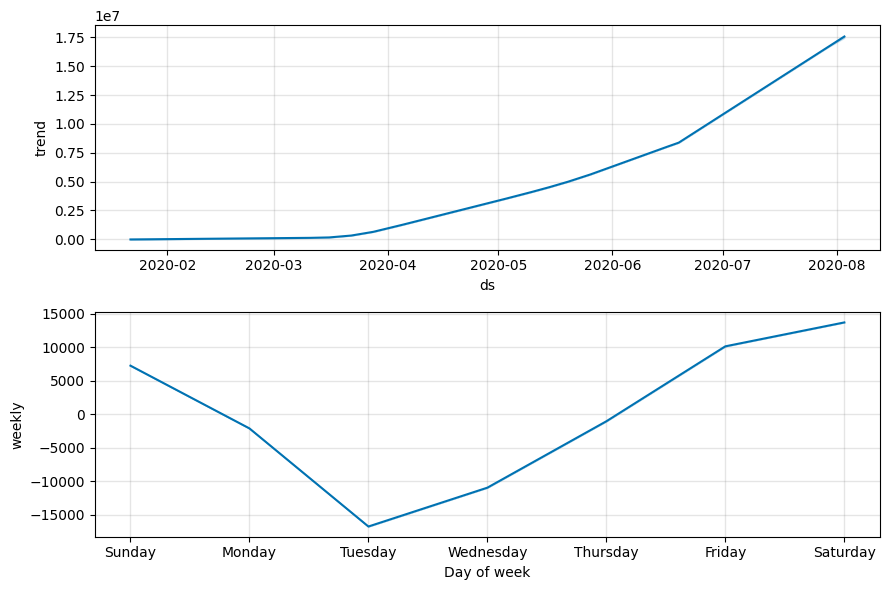

In [48]:
m.plot_components(forecast)

c:\Users\atul7\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\atul7\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



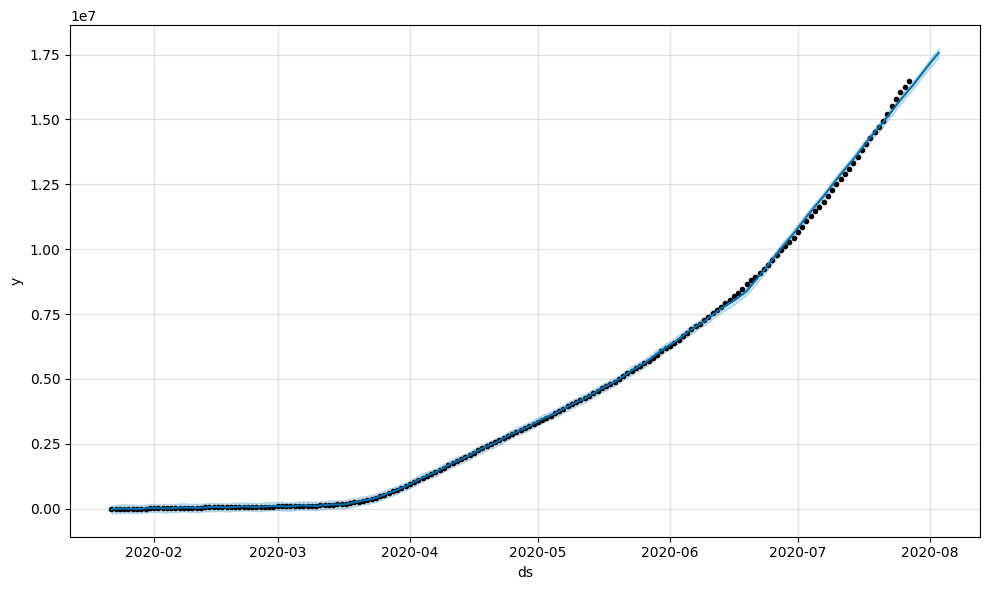

In [49]:
confirmed_forecast_plot = m.plot(forecast)

In [50]:
confirmed.head(20)

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927
